<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr17_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#stack import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
from sklearn.metrics import roc_curve, auc



In [2]:
#sprawdzamy wczytanie
df = pd.read_csv('sample_data/Bank_Personal_Loan_Modelling_MJ.csv',sep=';')
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,NaN,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,dwa,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
#sprawdzam typ danych
""" widać że eductation jest źle
    specjalnie dołożyłem tam NaN oraz zmienną tekstową
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           4999 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [4]:
#Zapisuje ile było danych przed czyszczeniem
n_before = len(df)

#Konwersja wszystkiego na numeryczne (śmieci → NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

#Szukamy wierszy, które zawierają jakikolwiek syf (NaN po konwersji)
mask_bad = df_numeric.isna().any(axis=1)

#Podsumowanie: co wycinamy
removed_rows = df[mask_bad].copy()   # oryginalne wartości (jeszcze przed konwersją)

#Wyrzucamy śmieci
df_clean = df_numeric.dropna()

#Podsumowanie ilościowe ---
n_after = len(df_clean)
n_removed = n_before - n_after

print("======= PODSUMOWANIE CZYSZCZENIA =======")
print(f"Liczba wierszy przed czyszczeniem:  {n_before}")
print(f"Liczba wierszy po czyszczeniu:      {n_after}")
print(f"Usunięto wierszy:                   {n_removed}")
print("\nWiersze usunięte (zawierały dane nienumeryczne lub NaN):")
print(removed_rows.head(20))  # pokazujemy maks 20, żeby nie zalać ekranu

# gotowy czysty dataset:
df_clean.head()
print('===============INFO======================')
df_clean.info()
df_clean.head(10)


======= PODSUMOWANIE CZYSZCZENIA =======
Liczba wierszy przed czyszczeniem:  5000
Liczba wierszy po czyszczeniu:      4998
Usunięto wierszy:                   2

Wiersze usunięte (zawierały dane nienumeryczne lub NaN):
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg Education  Mortgage  \
2   3   39          15      11     94720       1    1.0       NaN         0   
5   6   37          13      29     92121       4    0.4       dwa       155   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
2              0                   0           0       0           0  
5              0                   0           0       1           0  
===============INFO======================
<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4998 non-null   int64  
 1   Age                 4998 non-null 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1.0,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1.0,0,0,1,0,0,0
3,4,35,9,100,94112,1,2.7,2.0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2.0,0,0,0,0,0,1
6,7,53,27,72,91711,2,1.5,2.0,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3.0,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2.0,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3.0,0,1,0,0,0,0
10,11,65,39,105,94710,4,2.4,3.0,0,0,0,0,0,0
11,12,29,5,45,90277,3,0.1,2.0,0,0,0,0,1,0


In [5]:
#statystyka danych z usunietymi śmieciami
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4998.0,2501.498800,1442.944732,1.0,1252.25,2501.5,3750.75,5000.0
Age,4998.0,45.341337,11.464502,23.0,35.00,45.0,55.00,67.0
Experience,4998.0,20.107043,11.469581,-3.0,10.00,20.0,30.00,43.0
Income,4998.0,73.795718,46.030014,8.0,39.00,64.0,98.00,224.0
ZIP Code,4998.0,93152.395758,2122.110762,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4998.0,2.396359,1.147498,1.0,1.00,2.0,3.00,4.0
CCAvg,4998.0,1.938433,1.747823,0.0,0.70,1.5,2.50,10.0
Education,4998.0,1.889356,0.963390,1.0,1.00,2.0,3.00,34.0
Mortgage,4998.0,56.490396,101.721471,0.0,0.00,0.0,101.00,635.0
Personal Loan,4998.0,0.096038,0.294673,0.0,0.00,0.0,0.00,1.0


uwaga w Eductation wartość jest poza zakresem
wstawiłem 34. szukam wartości > 4 i jezeli są, wstawiam tam zero i wrzucam floor ze sredniej

In [8]:
#średnia wartości (1–4)
valid_mean = df_clean.loc[df_clean['Education'].between(1, 4), 'Education'].mean()
floor_mean = int(np.floor(valid_mean))

#wartości poza zakresem (>4) zamieniam na 0
df_clean.loc[df_clean['Education'] > 4, 'Education'] = 0

#zamieniamy 0 na floor ze średniej
df_clean.loc[df_clean['Education'] == 0, 'Education'] = floor_mean

#finalny typ
df_clean['Education'] = df_clean['Education'].astype(int)

df_clean['Education'].value_counts()


/tmp/ipython-input-1265418791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Education'] = df_clean['Education'].astype(int)


,count
Education,
1,2096
3,1500
2,1402


In [11]:
#statystyki i opis
df_clean.info()
df_clean.head(20)
df_clean.describe().apply(lambda x: round(x,2)).T #2 miejsca znaczące


<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4998 non-null   int64  
 1   Age                 4998 non-null   int64  
 2   Experience          4998 non-null   int64  
 3   Income              4998 non-null   int64  
 4   ZIP Code            4998 non-null   int64  
 5   Family              4998 non-null   int64  
 6   CCAvg               4998 non-null   float64
 7   Education           4998 non-null   int64  
 8   Mortgage            4998 non-null   int64  
 9   Personal Loan       4998 non-null   int64  
 10  Securities Account  4998 non-null   int64  
 11  CD Account          4998 non-null   int64  
 12  Online              4998 non-null   int64  
 13  CreditCard          4998 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.7 KB


,count,mean,std,min,25%,50%,75%,max
ID,4998.0,2501.50,1442.94,1.0,1252.25,2501.5,3750.75,5000.0
Age,4998.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,4998.0,20.11,11.47,-3.0,10.00,20.0,30.00,43.0
Income,4998.0,73.80,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,4998.0,93152.40,2122.11,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4998.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,4998.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,4998.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,4998.0,56.49,101.72,0.0,0.00,0.0,101.00,635.0
Personal Loan,4998.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


In [12]:
#oddzielamy zmienną docelową (czy dostanie pożyczkę) - można pop
X=df_clean.copy() #kopia
y=X.pop('Personal Loan') #wyrwij target z X


In [14]:
X.head(2) #w df nie ma już targetu

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0


In [16]:
y.head(3) #target

,Personal Loan
0,0
1,0
3,0


Aby sprawdzić czy nie ma odstających, robimy histogramy

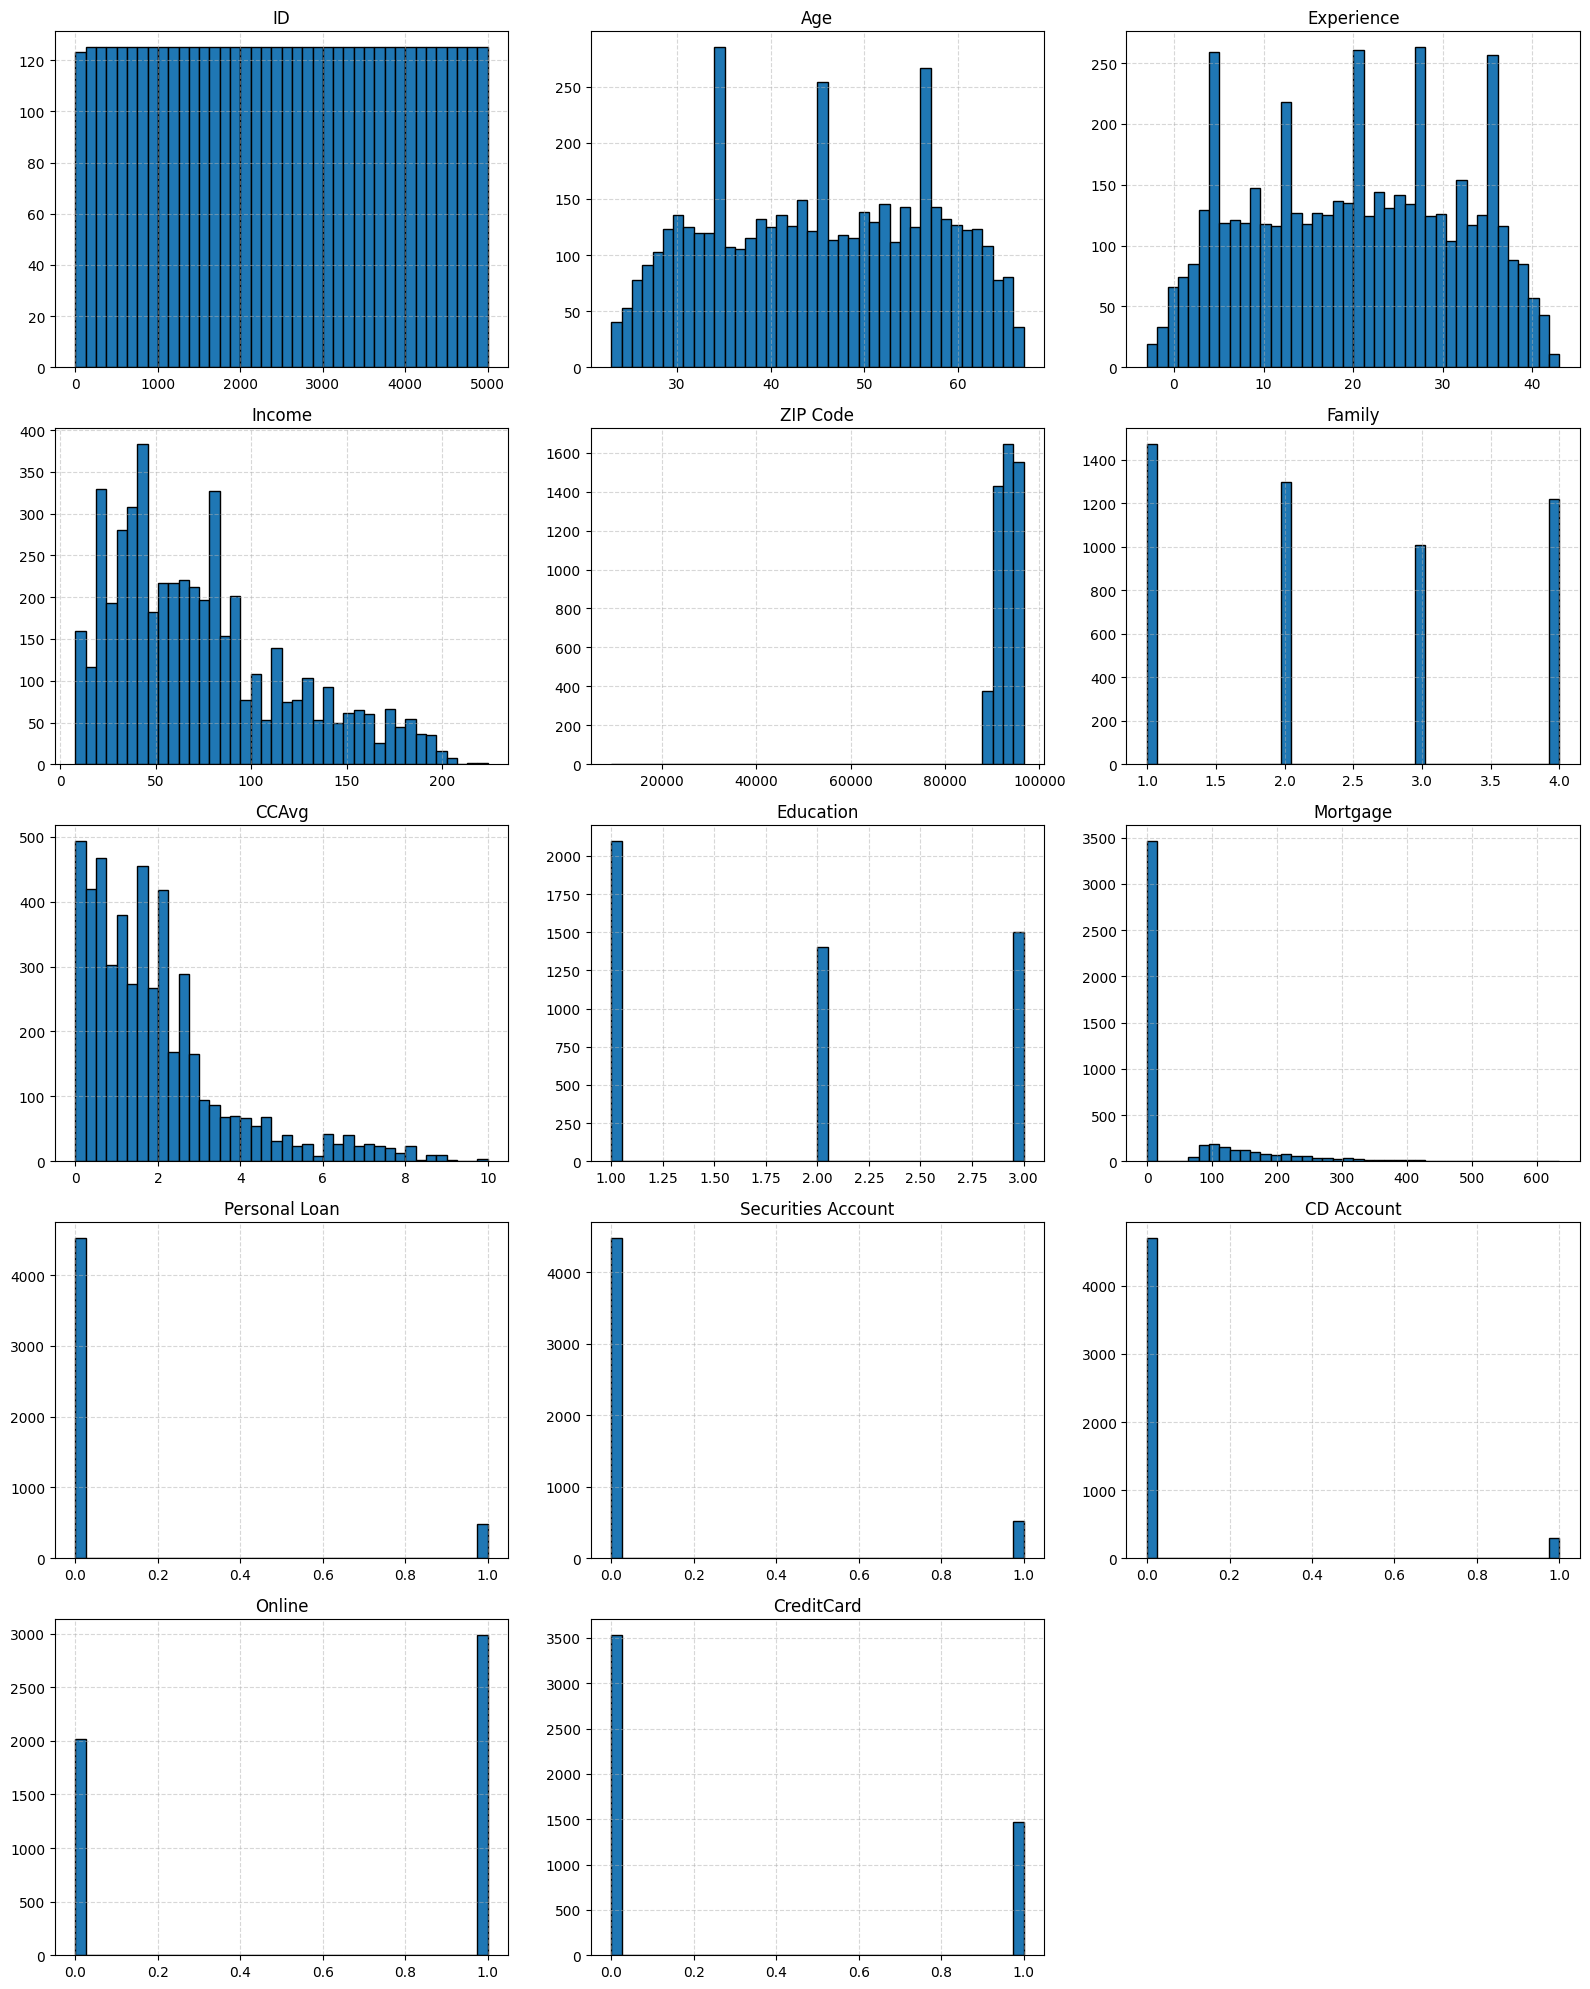

In [18]:
import matplotlib.pyplot as plt

df_plot = df_clean.copy()

# Automatyczne ustawienie liczby kolumn w siatce
n_cols = 3
n_rows = int(np.ceil(len(df_plot.columns) / n_cols))

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(df_plot.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_plot[col], bins=40, edgecolor='black')
    plt.title(col)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [20]:
#podział na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tree = DecisionTreeClassifier(max_depth=3)
#tree.fit(X_train, y_train)


(3748, 13)
(1250, 13)
(3748,)
(1250,)


In [22]:
scaler = StandardScaler()

#Uczymy scaler TYLKO na danych treningowych
scaler.fit(X_train)

#Transformujemy train i test tymi samymi parametrami
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)


(3748, 13)
(1250, 13)


#Budowa Modelu

In [25]:
tree0 = DecisionTreeClassifier(max_depth=3)
tree0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
tree0.score(X_test, y_test)

0.9784

@depth 3 - normalizowane

In [27]:
tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
tree1.score(X_test_scaled, y_test)

0.9784

In [29]:
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
tree2.score(X_test_scaled, y_test)

0.9792

In [39]:
#predykcja danych testowych
y_pred0=tree0.predict(X_test)
#y_pred=tree0.predict(X_test)
y_pred0

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
#predykcja danych testowych
y_pred1=tree1.predict(X_test_scaled)
#y_pred=tree1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
#predykcja danych testowych
y_pred2=tree2.predict(X_test_scaled)
#y_pred=tree2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
#wektor prawdziwy
y_test

,Personal Loan
1489,0
1774,0
1163,0
2552,0
1173,0
...,...
762,0
700,0
2973,0
3683,0


In [47]:
#druga opcji porównania
print(accuracy_score(y_test,y_pred0))
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))

0.9784
0.9784
0.9792


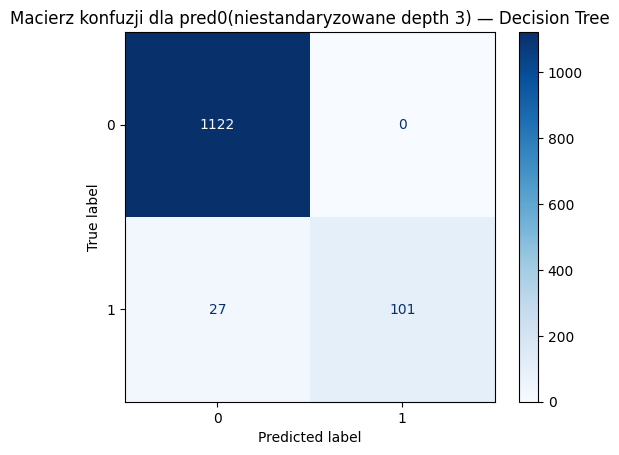

In [49]:
#Macierze konfuzji dla 0

# macierz konfuzji
cm = confusion_matrix(y_test, y_pred0)

# wyświetlenie
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Macierz konfuzji dla pred0(niestandaryzowane depth 3) — Decision Tree")
plt.show()


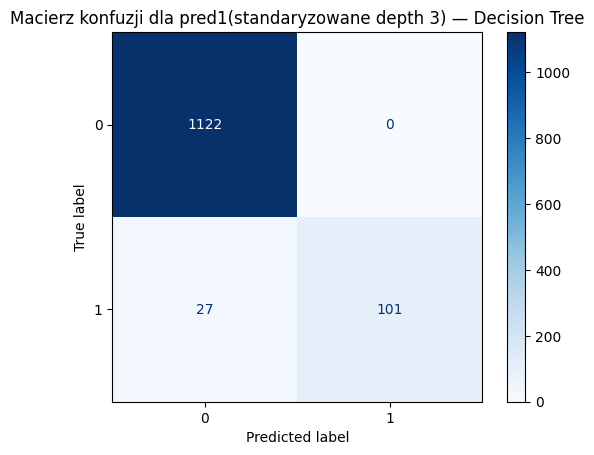

In [50]:
#Macierze konfuzji dla 1

# macierz konfuzji
cm = confusion_matrix(y_test, y_pred1)

# wyświetlenie
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Macierz konfuzji dla pred1(standaryzowane depth 3) — Decision Tree")
plt.show()


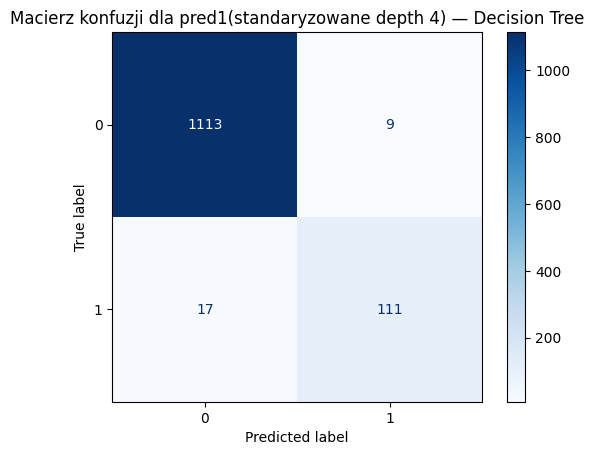

In [51]:
#Macierze konfuzji dla 2

# macierz konfuzji
cm = confusion_matrix(y_test, y_pred2)

# wyświetlenie
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Macierz konfuzji dla pred1(standaryzowane depth 4) — Decision Tree")
plt.show()

In [60]:
print(X.columns) #kolumny

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


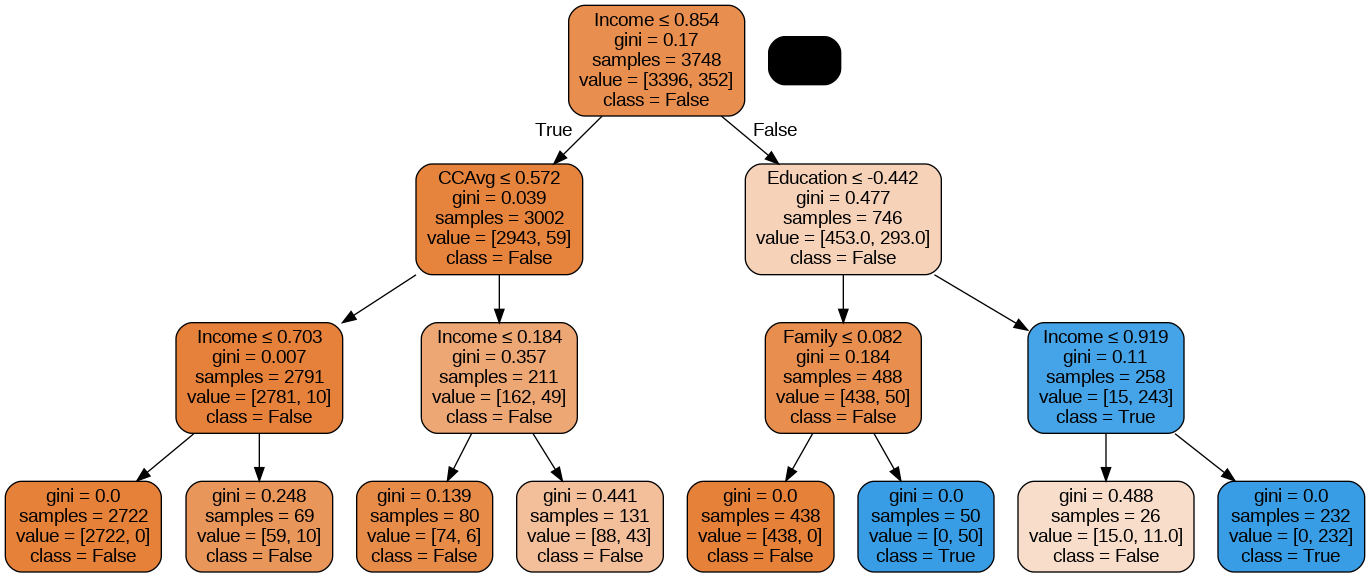

In [66]:
#drzewo z głębokością 3
dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['False', 'True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree1.png')
Image(graph.create_png())

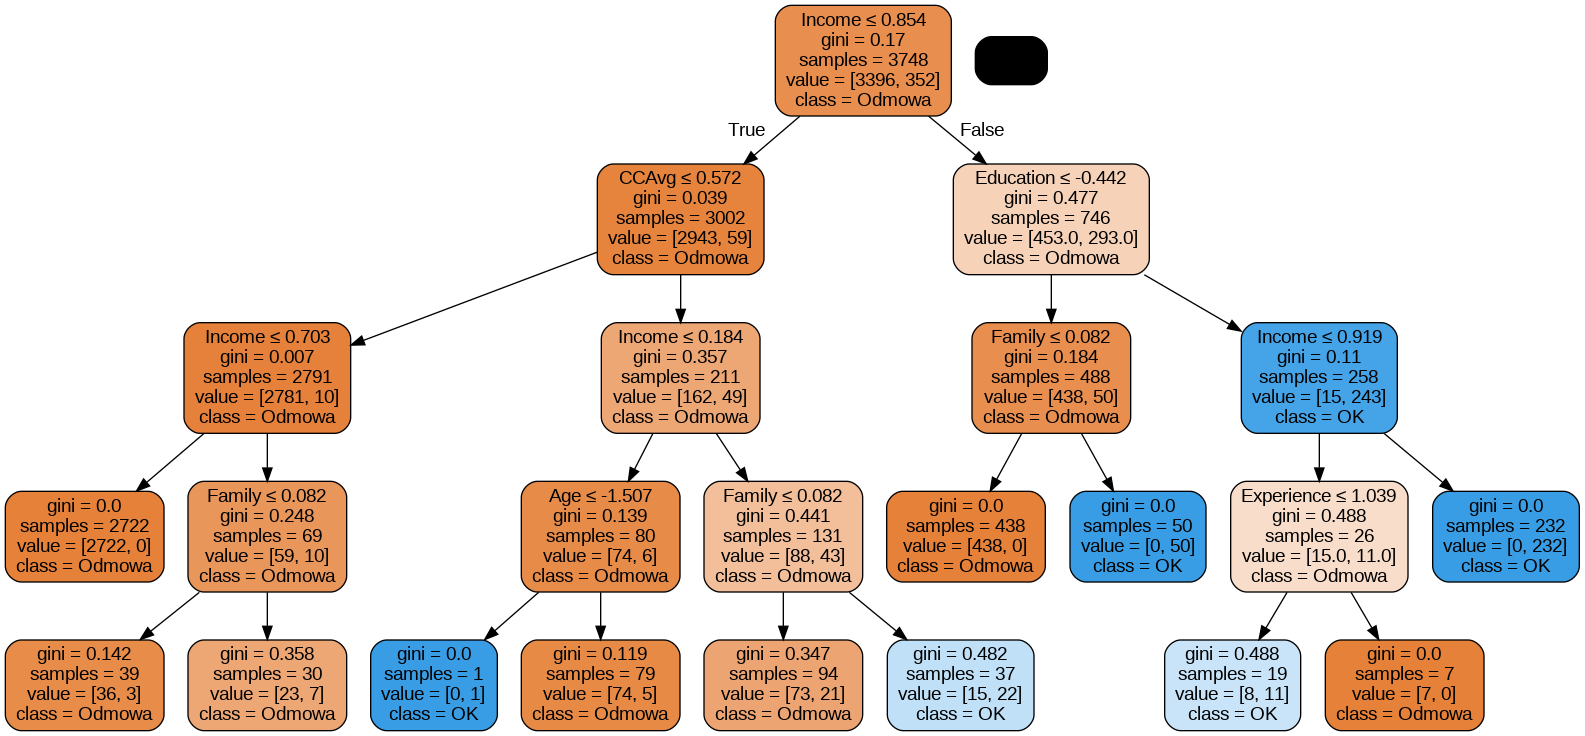

In [67]:
#drzewo z głębokością 4
dot_data = StringIO()
export_graphviz(tree2, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['Odmowa', 'OK'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree2.png')
Image(graph.create_png())

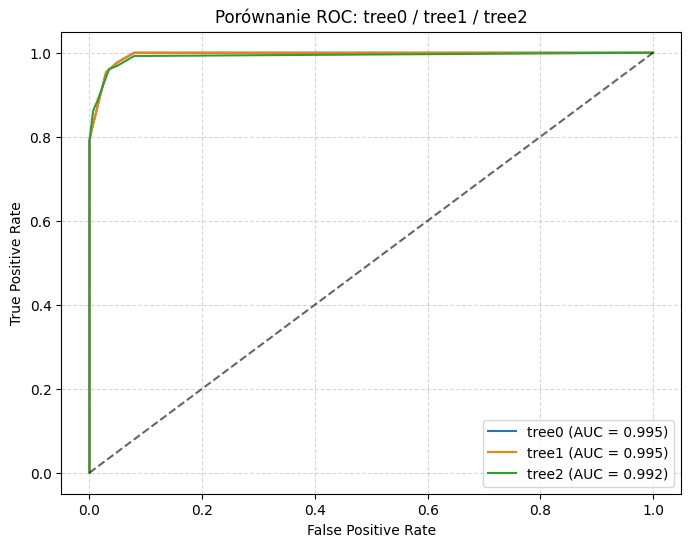

In [70]:
#porównanie ROC dla 3 modeli (depth3 - nieskalowany, depth 3 skalowany, depth 4 sklalowany)
plt.figure(figsize=(8, 6))

models = [
    ("tree0", tree0, X_test),          # tree0 (3) trenowany bez skalowania
    ("tree1", tree1, X_test_scaled),   # tree1 (3) standaryzacja
    ("tree2", tree2, X_test_scaled)    # tree2 (4) standaryzacja
]

for name, model, X in models:
    # prawdopodobieństwa
    y_proba = model.predict_proba(X)[:, 1]

    # krzywa ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # wykres
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# linia losowa
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Porównanie ROC: tree0 / tree1 / tree2")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
